In [ ]:
 #install the python sdk
 !pip install -q -U google-generativeai

In [3]:
# Import necessary packages
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import Markdown, display

# Define a function to convert text to Markdown format
def to_markdown(text):
    # Replace dot (.) with '*' or any other formatting symbol as needed
    text = text.replace('.', '*')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


In [5]:
# used to securely store your API key

from google.colab import userdata


In [9]:
#we have named our api key as GOOGLE_API_KEY where we have stored our secret key so we are fetching an environment variable.
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [33]:
# we will list our models so we use list_models to see the available Gemini models
#gemini-pro : optimized for text-only prompts
#gemini-pro-vision : optimized for text-and-images prompts

for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp

In [40]:
# for text-only prompts use the gemini-pro model :

model = genai.GenerativeModel('gemini-2.5-flash')

In [41]:
model

genai.GenerativeModel(
    model_name='models/gemini-2.5-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [75]:
%%time
response = model.generate_content("what is definition of deprecation")

CPU times: user 954 ms, sys: 81.5 ms, total: 1.04 s
Wall time: 26.7 s


In [45]:
response



response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "**Deprecation** refers to the process of marking a feature, function, standard, practice, or piece of technology as **outdated or obsolete**, signifying that it should no longer be used.\n\nHere's a breakdown of what that typically means:\n\n1.  **Formal Warning:** It's a formal announcement or a warning to users (especially developers or system administrators) that while the item might still work for now, it is discouraged, and alternatives are available or preferred.\n\n2.  **No Longer Recommended:** Users are strongly advised to stop using the deprecated item and migrate to the recommended alternatives. Continuing to use it can lead to compatibility issues, security vulnerabilities, or poor performance in the future.\n\n3.  **Eventual Removal or Unsupport

In [46]:
response.text

'**Deprecation** refers to the process of marking a feature, function, standard, practice, or piece of technology as **outdated or obsolete**, signifying that it should no longer be used.\n\nHere\'s a breakdown of what that typically means:\n\n1.  **Formal Warning:** It\'s a formal announcement or a warning to users (especially developers or system administrators) that while the item might still work for now, it is discouraged, and alternatives are available or preferred.\n\n2.  **No Longer Recommended:** Users are strongly advised to stop using the deprecated item and migrate to the recommended alternatives. Continuing to use it can lead to compatibility issues, security vulnerabilities, or poor performance in the future.\n\n3.  **Eventual Removal or Unsupport:** Deprecation often indicates that the item will eventually be removed, cease to be supported, or function incorrectly in future versions or updates of the system, software, or standard. There\'s usually a grace period, but rel

In [47]:
# to display formatted markdown text , use to_markdown function :

to_markdown(response.text)

> **Deprecation** refers to the process of marking a feature, function, standard, practice, or piece of technology as **outdated or obsolete**, signifying that it should no longer be used.
> 
> Here's a breakdown of what that typically means:
> 
> 1.  **Formal Warning:** It's a formal announcement or a warning to users (especially developers or system administrators) that while the item might still work for now, it is discouraged, and alternatives are available or preferred.
> 
> 2.  **No Longer Recommended:** Users are strongly advised to stop using the deprecated item and migrate to the recommended alternatives. Continuing to use it can lead to compatibility issues, security vulnerabilities, or poor performance in the future.
> 
> 3.  **Eventual Removal or Unsupport:** Deprecation often indicates that the item will eventually be removed, cease to be supported, or function incorrectly in future versions or updates of the system, software, or standard. There's usually a grace period, but reliance on deprecated features is risky.
> 
> 4.  **Why It Happens:**
>     *   **Better Alternatives:** More efficient, secure, performant, or modern methods have been developed.
>     *   **Security Vulnerabilities:** The old method has known security flaws.
>     *   **Performance Improvements:** The new method offers significant speed or resource benefits.
>     *   **Simplification/Modernization:** To streamline systems, remove complexity, or align with new design principles.
>     *   **Compliance:** To meet new industry standards or regulatory requirements.
>     *   **Reduced Maintenance Burden:** Developers want to reduce the effort needed to maintain old, less-used code or features.
> 
> **Common Contexts:**
> 
> *   **Software Development:** APIs (Application Programming Interfaces), functions, libraries, or programming language features can be deprecated.
> *   **Web Standards:** HTML tags, CSS properties, or JavaScript features that are no longer best practice or have been replaced.
> *   **Hardware:** Older hardware models might be "deprecated" meaning they will no longer receive software updates or support.
> *   **Company Policies/Standards:** An old way of doing something within an organization might be deprecated in favor of a new process.
> 
> In essence, **deprecation is a signal of transition**, providing users with a heads-up to adapt and move away from something that is no longer considered the best or safest option, and which may eventually disappear altogether.

In [50]:
# if the api failed to return a result , use GenerateContentResponse.prompt_feedback  to see if it was blocked due to safety concerns regarding the prompt

response.prompt_feedback

In [51]:
# stream the response as it is being generated , and the model will return chunks of the response as soon as they are generated

response = model.generate_content("what is definition of deprecation" , stream = True)

In [53]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

In the context of technology, software development, and standards, **deprecation** refers to the process of marking a feature, function, API (Application
________________________________________________________________________________
 Programming Interface), standard, or practice as **outdated, discouraged, or scheduled for removal in a future version.**

Here's a breakdown of what that means:

1.  **Not Immediate Removal:** When something is deprecated, it typically
________________________________________________________________________________
 still functions and is available in the current version. Deprecation is a *warning* or a *signal* rather than an immediate deletion.
2.  **Warning of Future Changes:** It serves as a notice to users, developers, or implement
________________________________________________________________________________
ers that the deprecated item will likely be removed, modified, or no longer supported in upcoming releases or versions.
3.  **Reasons for D

In [54]:
# Generate text from image and text inputs

# gemini provides a multimodal model ( gemini-pro-vision)
# that accepts both text and images and inputs
# GenerativeModel.generate_content API is designed to handle multimodal prompts
# and return a text output.

In [55]:
model

genai.GenerativeModel(
    model_name='models/gemini-2.5-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [56]:
genai.list_models()

<generator object list_models at 0x7c342a272240>

In [57]:
!curl https://www.python.org/static/apple-touch-icon-144x144-precomposed.png > image.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7382  100  7382    0     0  42178      0 --:--:-- --:--:-- --:--:-- 42182


In [61]:
from PIL import Image

# Open the image file
image = Image.open('image.png')

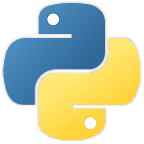

In [62]:
image

In [63]:
# use the gemini-pro-vision model and pass the image to
# the model with generate_content

In [67]:
model = genai.GenerativeModel('gemini-1.5-flash-latest')

In [68]:
response = model.generate_content(image)

to_markdown(response.text)

> That's the logo for **Python**, a popular high-level, general-purpose programming language.  The logo depicts two intertwined snakes, representing the language's name (a reference to the British comedy group Monty Python).


In [70]:

from PIL import Image

# Open the image file
image = Image.open('logo.jpg')

In [71]:
response = model.generate_content(image)

to_markdown(response.text)

> Here is a description of the image: Close-up view of Neymar Jr., the famous Brazilian soccer player, smiling and holding a Paris Saint-Germain jersey. 
> 
> 
> Here's a breakdown of the image:
> 
> * **Neymar:** He is the central focus, occupying most of the frame. His hair is styled in a textured, slightly bleached look. He's wearing a dark blue Paris Saint-Germain home jersey with the "Fly Emirates" sponsor prominently displayed.  He has a very slight stubble beard and a happy, relaxed expression.
> 
> * **The Jersey:** He's holding a maroon-colored Paris Saint-Germain away jersey, which has his name, "NEYMAR JR," clearly printed on the back.
> 
> * **Background:** The background is blurred, indicative of a shallow depth of field, but shows a soccer stadium with blue seating. This suggests the photo was taken at a stadium event.
> 
> * **Overall:** The image is well-lit and professionally taken, likely during a press event or similar occasion where players are presented with new kits or are doing promotional work. The focus is clearly on Neymar and his positive expression.
